In [52]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import random

In [53]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)
print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [54]:
df=pd.DataFrame(X,columns=['col0','col1','col2','col3','col4'])
df['Target']=y
print(df.shape)
df

(100, 6)


,col0,col1,col2,col3,col4,Target
0,1.080682,1.511175,-3.943527,-0.581317,-1.235114,1
1,-0.479316,1.092716,-1.603432,0.887546,0.966792,0
2,-0.155713,2.683327,-1.294370,0.480396,3.543890,0
3,-1.272193,-0.852651,-2.007150,2.096003,0.589759,0
4,-2.199976,1.442536,0.502275,0.692702,2.351679,0
...,...,...,...,...,...,...
95,-1.301804,-1.717621,1.534072,0.412633,-0.020681,1
96,2.473233,2.698750,-1.253875,1.447876,2.048019,1
97,1.440188,1.568745,-1.023492,1.410624,1.447803,1
98,2.216210,1.082130,0.549021,0.709373,0.560039,1


In [55]:
#functions for sampling

def row_sampling(df,percent):
    return df.sample(int(percent*(df.shape[0])),replace=True)

def feature_sampling(df,percent):
    dftemp=df.drop('Target',axis=1)
    dftemp= dftemp.sample(int(percent*(dftemp.shape[1])),replace=True,axis=1)
    dftemp['Target']=df['Target']
    return dftemp   

def combined_sampling(df,percent_col,percent_row):
    new_df=row_sampling(df,percent_row)
    return feature_sampling(new_df,percent_col)
    

In [87]:
df1=row_sampling(df,0.2)
df2=row_sampling(df,0.2)
df3=row_sampling(df,0.2)

In [88]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

clf1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.112\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6, 0.5, 'x[3] <= -0.562\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

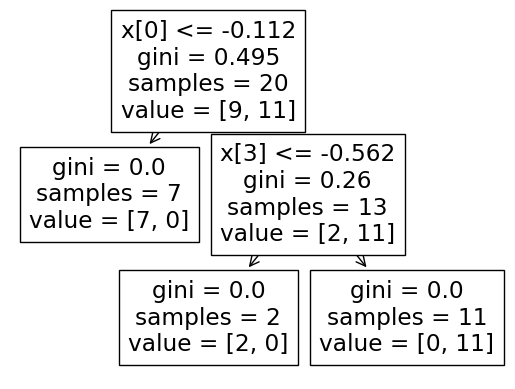

In [89]:
plot_tree(clf1)

[Text(0.375, 0.875, 'x[0] <= -0.601\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5, 0.625, 'x[3] <= -0.156\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.25, 0.375, 'x[4] <= -0.69\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.375, 'x[4] <= -1.246\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

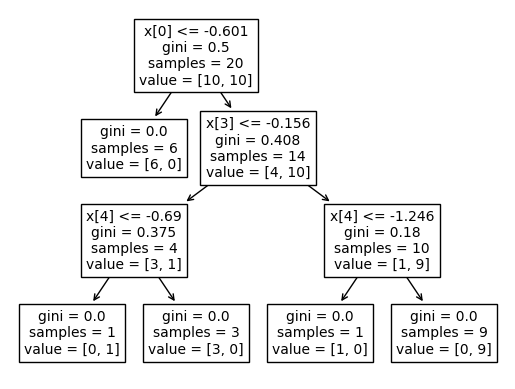

In [90]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.509\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6, 0.5, 'x[3] <= -1.472\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

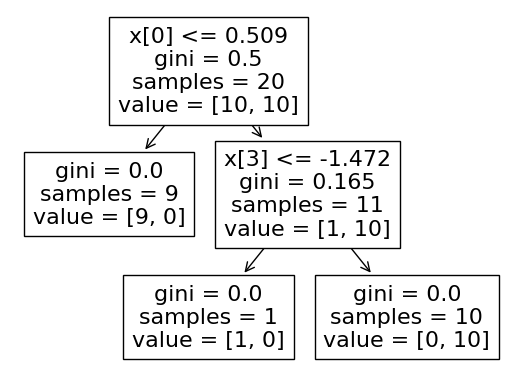

In [91]:
plot_tree(clf3)

In [92]:
clf1.predict(np.array([2.216210,1.082130,0.549021,0.709373,0.560039]).reshape(1,5))

c:\Users\Ishaan Verma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [106]:
clf2.predict(np.array([2.216210,1.082130,0.549021,0.709373,0.560039]).reshape(1,5))

c:\Users\Ishaan Verma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [105]:
clf3.predict(np.array([2.216210,1.082130,0.549021,-1.709373,0.560039]).reshape(1,5))

c:\Users\Ishaan Verma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])